<a href="https://colab.research.google.com/github/sachinmotwani20/SP_Python/blob/master/Ch2%2C2Amplitude%26Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amplitude and Phase
[For more examples: https://github.com/AllenDowney/ThinkDSP/blob/master/code/phase.ipynb ]

***Complex Amplitudes***

*   Spectrum contains frequencies fs, & complex amplitudes, hs.

*   Each element of hs encodes a magnitude and a phase offset.

*   Amplitude indicates loudness.

***Phase Offset***

*   Phase coffeset indicates where the signal "Starts".

In [0]:
!pip install thinkx

     |████████████████████████████████| 51kB 2.3MB/s 
  Created wheel for thinkx: filename=thinkx-1.1.3-cp36-none-any.whl size=59941 sha256=163433619a400eb47644c405e422f0a7a3a6983e1339056db821a9acf337fee9
  Stored in directory: /root/.cache/pip/wheels/74/e9/57/f4ad676ba30144b574a6cc36606e82874f8aac8271112f1cd3
Successfully built thinkx


In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp 
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Make a sawtooth wave.

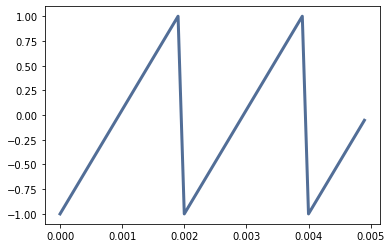

In [0]:
signal = thinkdsp.SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()

Play it.

In [0]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [0]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [0]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

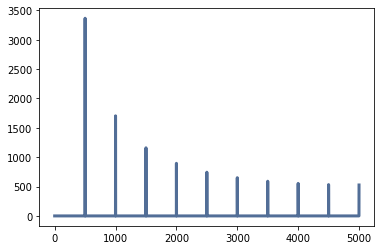

In [0]:
magnitude = np.absolute(hs)
thinkplot.plot(fs, magnitude)

Plot the phases vs the frequencies.

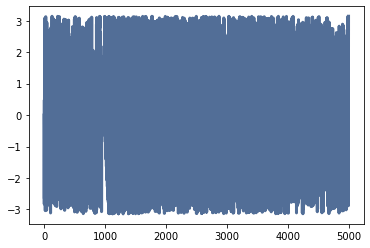

In [0]:
angle = np.angle(hs)
thinkplot.plot(fs, angle)

#What does the phase sound like?
We know that increasing amplitude will increase loudness; what will happen when we manipulate phase?

Shuffle the phases.

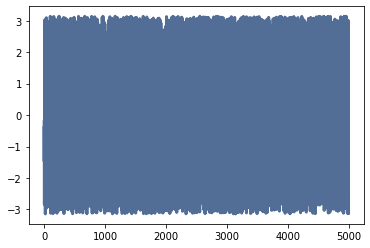

In [0]:
import random
random.shuffle(angle) #To shuffle the sawtooth phases & observe the changes
thinkplot.plot(fs, angle)

Put the shuffled phases back into the spectrum. Each element in hs is a complex number with magnitude A & phase, $\phi$ with which we can compute $A e^{i \phi}$

In [0]:
i = complex (0,1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i*angle)

Convert the spectrum back to wave (using irfft)

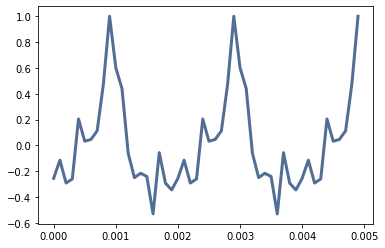

In [0]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration = 0.005)
segment.plot()

Observe that this is considerably different from the actual sawtooth we took earlier.Even when we have the same aplitude for each frequency component, the change is only in the phase.

Play with the wave with the shuffled phases.

In [0]:
wave2.make_audio()

For comparision, here's the original audio.

In [0]:
wave.make_audio()

Although, the two signals have different waveforms, they ahave the same frequency component with the same amplitudes. They differ only in phase.